In [1]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip intsall pandas

ERROR: unknown command "intsall" - maybe you meant "install"
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [23]:
pip install seaborn

     |████████████████████████████████| 292 kB 1.4 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [65]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

In [7]:
x_bp = pd.read_excel(io = "./hw_data_composite/X_bp.xlsx")
x_bp = x_bp.astype({'Unnamed: 0':'int'})
x_bp

,Unnamed: 0,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000
1,1,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000
2,2,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000
3,3,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000
4,4,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000
...,...,...,...,...,...,...,...,...,...,...,...
1018,1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669
1019,1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099
1020,1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764
1021,1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067


In [8]:
x_nup = pd.read_excel(io = "./hw_data_composite/X_nup.xlsx")
x_nup = x_nup.astype({'Unnamed: 0':'int','Угол нашивки, град':'int'})
x_nup

,Unnamed: 0,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0,0,4.000000,57.000000
1,1,0,4.000000,60.000000
2,2,0,4.000000,70.000000
3,3,0,5.000000,47.000000
4,4,0,5.000000,57.000000
...,...,...,...,...
1035,1035,90,8.088111,47.759177
1036,1036,90,7.619138,66.931932
1037,1037,90,9.800926,72.858286
1038,1038,90,10.079859,65.519479


In [9]:
dataset = pd.merge(x_bp, x_nup, how='inner', on='Unnamed: 0')
dataset = dataset.drop(labels = 'Unnamed: 0', axis = 1)
dataset

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000,0,4.000000,57.000000
1,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,0,4.000000,60.000000
2,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000,0,4.000000,70.000000
3,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,0,5.000000,47.000000
4,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0,5.000000,57.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,90,9.076380,47.019770
1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,90,10.565614,53.750790
1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,90,4.161154,67.629684
1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,90,6.313201,58.261074


array([[<AxesSubplot:title={'center':'Соотношение матрица-наполнитель'}>,
        <AxesSubplot:title={'center':'Плотность, кг/м3'}>,
        <AxesSubplot:title={'center':'модуль упругости, ГПа'}>,
        <AxesSubplot:title={'center':'Количество отвердителя, м.%'}>],
       [<AxesSubplot:title={'center':'Содержание эпоксидных групп,%_2'}>,
        <AxesSubplot:title={'center':'Температура вспышки, С_2'}>,
        <AxesSubplot:title={'center':'Поверхностная плотность, г/м2'}>,
        <AxesSubplot:title={'center':'Модуль упругости при растяжении, ГПа'}>],
       [<AxesSubplot:title={'center':'Прочность при растяжении, МПа'}>,
        <AxesSubplot:title={'center':'Потребление смолы, г/м2'}>,
        <AxesSubplot:title={'center':'Угол нашивки, град'}>,
        <AxesSubplot:title={'center':'Шаг нашивки'}>],
       [<AxesSubplot:title={'center':'Плотность нашивки'}>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

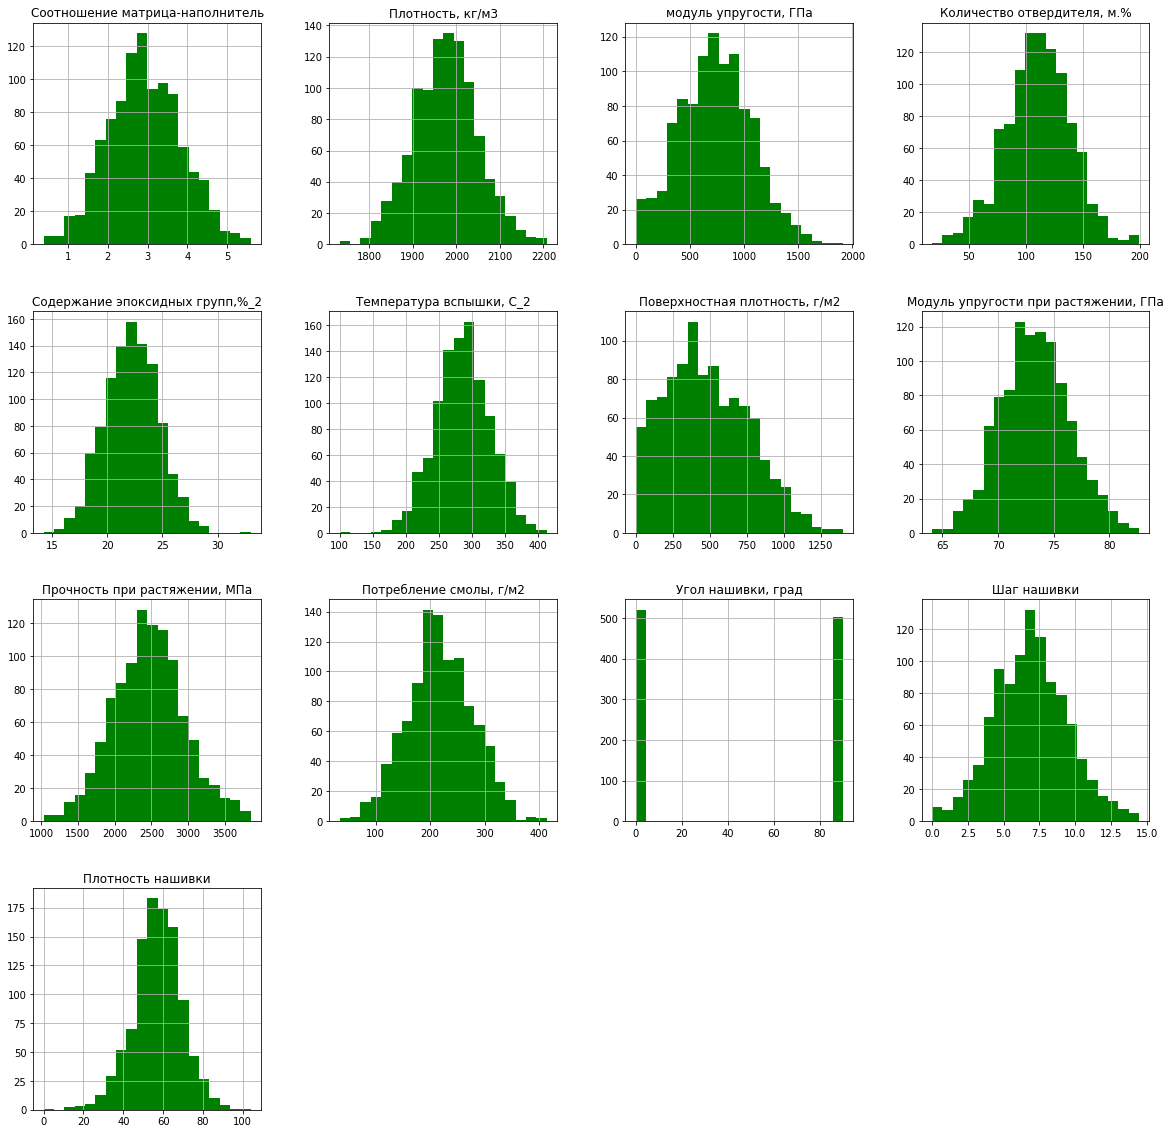

In [70]:
dataset.hist(figsize = (20, 20), bins = 20, color = 'green')

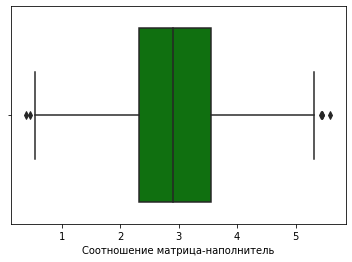

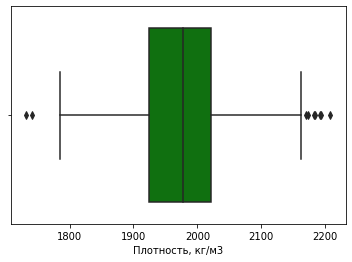

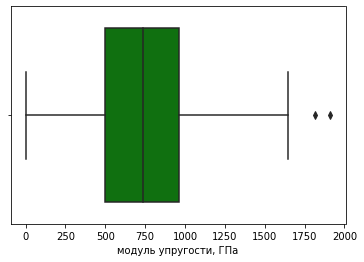

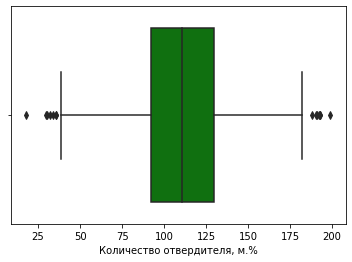

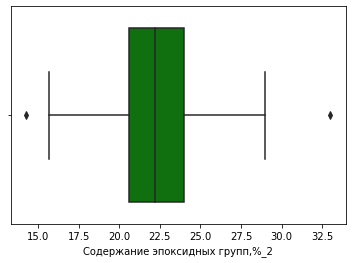

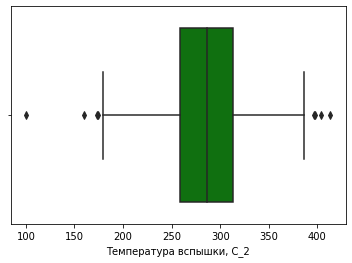

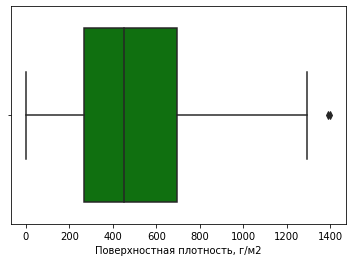

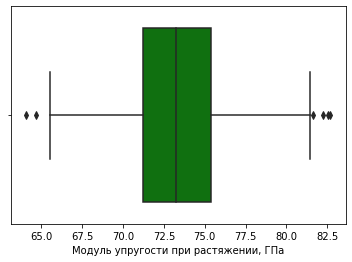

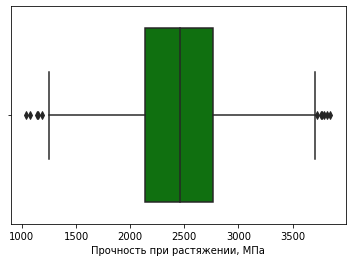

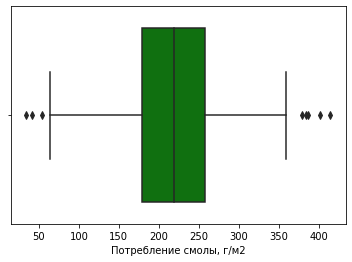

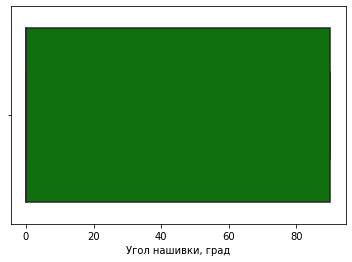

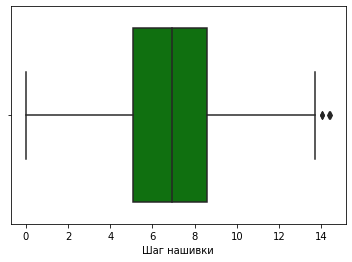

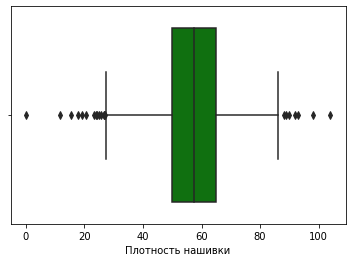

In [64]:
for col in dataset.columns:
    sns.boxplot(x = dataset[col], color = 'green')
    plt.show()

array([[<AxesSubplot:xlabel='Соотношение матрица-наполнитель', ylabel='Соотношение матрица-наполнитель'>,
        <AxesSubplot:xlabel='Плотность, кг/м3', ylabel='Соотношение матрица-наполнитель'>,
        <AxesSubplot:xlabel='модуль упругости, ГПа', ylabel='Соотношение матрица-наполнитель'>,
        <AxesSubplot:xlabel='Количество отвердителя, м.%', ylabel='Соотношение матрица-наполнитель'>,
        <AxesSubplot:xlabel='Содержание эпоксидных групп,%_2', ylabel='Соотношение матрица-наполнитель'>,
        <AxesSubplot:xlabel='Температура вспышки, С_2', ylabel='Соотношение матрица-наполнитель'>,
        <AxesSubplot:xlabel='Поверхностная плотность, г/м2', ylabel='Соотношение матрица-наполнитель'>,
        <AxesSubplot:xlabel='Модуль упругости при растяжении, ГПа', ylabel='Соотношение матрица-наполнитель'>,
        <AxesSubplot:xlabel='Прочность при растяжении, МПа', ylabel='Соотношение матрица-наполнитель'>,
        <AxesSubplot:xlabel='Потребление смолы, г/м2', ylabel='Соотношение матриц

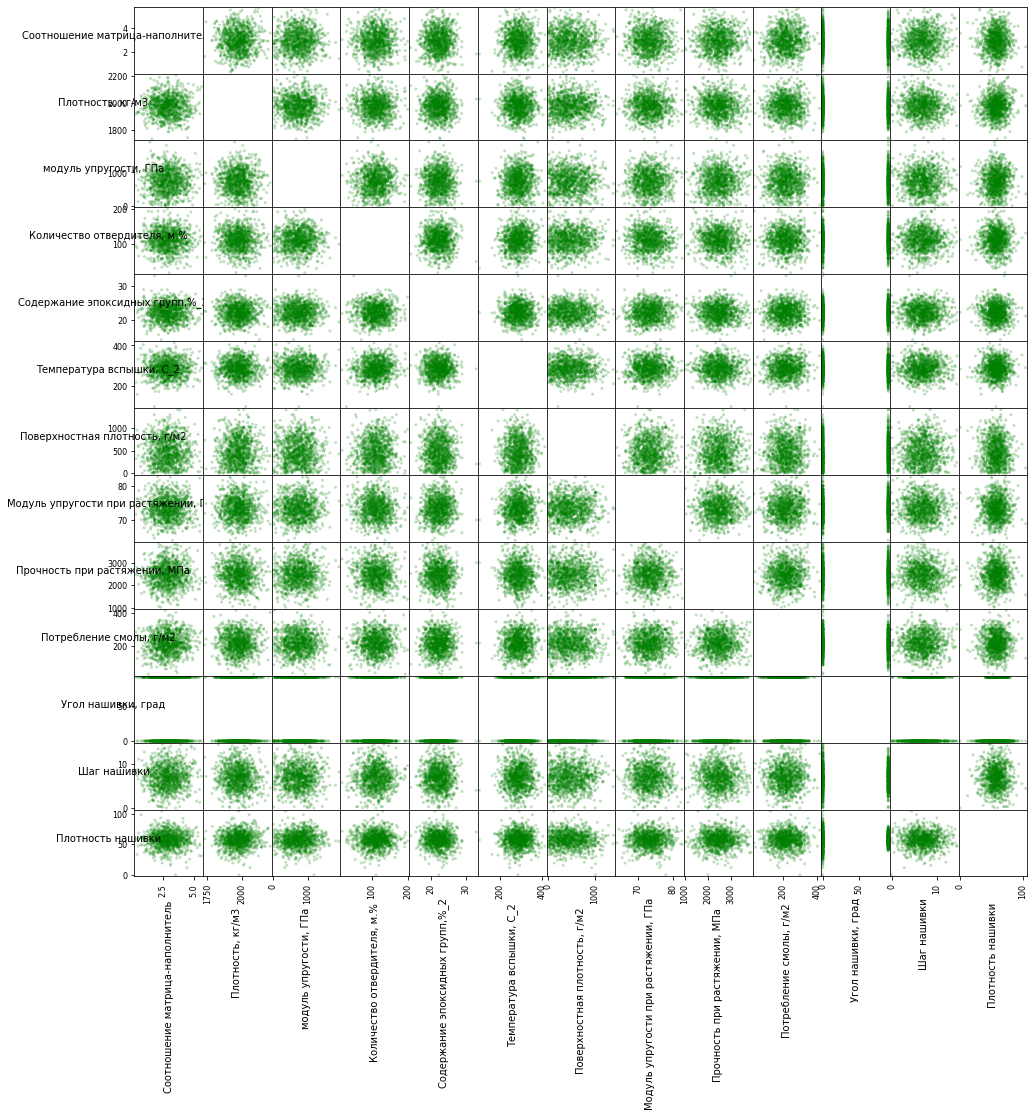

In [95]:
pair_diagram = scatter_matrix(dataset, figsize = (16, 16), alpha = 0.25, color = 'green', diagonal = None)
for ax in pair_diagram.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 10, rotation = 90)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 10, rotation = 0)
pair_diagram